In [56]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [57]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [84]:
# Reading Zillow data to estimate the prices for 2- bedroom sets
df= pd.read_csv('/Users/himanshee_tyagi/Documents/Python_Projects/Airbnb/Zip_Zhvi_2bedroom.csv')
df.head(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [85]:
#furniture = df.loc[df['Category'] == 'Furniture']

In [86]:
df = df[df['State']=='NY']
df = df[df['City']== 'New York']
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [87]:
# Let's Drop columns of  state and city as we are dealing with data frame of information only new york city
df.drop(['City','State', 'Metro','RegionID','SizeRank','CountyName'], axis=1, inplace= True)

In [88]:
df.head(5)

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,10023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,10128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,10011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [89]:
# Renaming the column ' Region Name' which denotes the zip code of the region as Region Name is confusing.
df.rename(columns ={"RegionName": "ZipCode"}, inplace= True)

In [90]:
# Indexing with time Series Data
df.reset_index(drop=True, inplace=True)

In [91]:
df.set_index('ZipCode',drop=True, inplace=True)

In [92]:
df_t = np.transpose(df)
df_t.head()

ZipCode,10025,10023,10128,10011,10003,11201,11234,10314,11215,10028,...,10312,10022,11217,10013,11231,10304,10305,10309,10308,10303
1996-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123100.0,NaN,NaN,...,153000.0,NaN,NaN,NaN,NaN,117500.0,131900.0,129100.0,149600.0,99200.0
1996-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124000.0,NaN,NaN,...,149800.0,NaN,NaN,NaN,NaN,113700.0,131900.0,129200.0,148200.0,102000.0
1996-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123900.0,NaN,NaN,...,146900.0,NaN,NaN,NaN,NaN,111200.0,131400.0,129000.0,146800.0,103900.0
1996-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123300.0,NaN,NaN,...,144800.0,NaN,NaN,NaN,NaN,111100.0,130800.0,129400.0,144800.0,105400.0
1996-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122900.0,NaN,NaN,...,143000.0,NaN,NaN,NaN,NaN,110400.0,130200.0,130300.0,143100.0,106900.0


In [93]:
# shows , Data is not available till Aug 2004 (2004-08), we have data from 2004-09 onwards
df.iloc[0:5,100:259]

,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
ZipCode,,,,,,,,,,,,,,,,,,,,,
10025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
10023,NaN,1526800.0,1424500.0,1346600.0,1331300.0,1322500.0,1289300.0,1265400.0,1249700.0,1241100.0,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
10128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
10011,NaN,1384000.0,1325500.0,1297400.0,1313500.0,1332400.0,1314500.0,1296700.0,1295100.0,1280000.0,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
10003,NaN,1387000.0,1315300.0,1265900.0,1217100.0,1167500.0,1125800.0,1106100.0,1105900.0,1119200.0,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


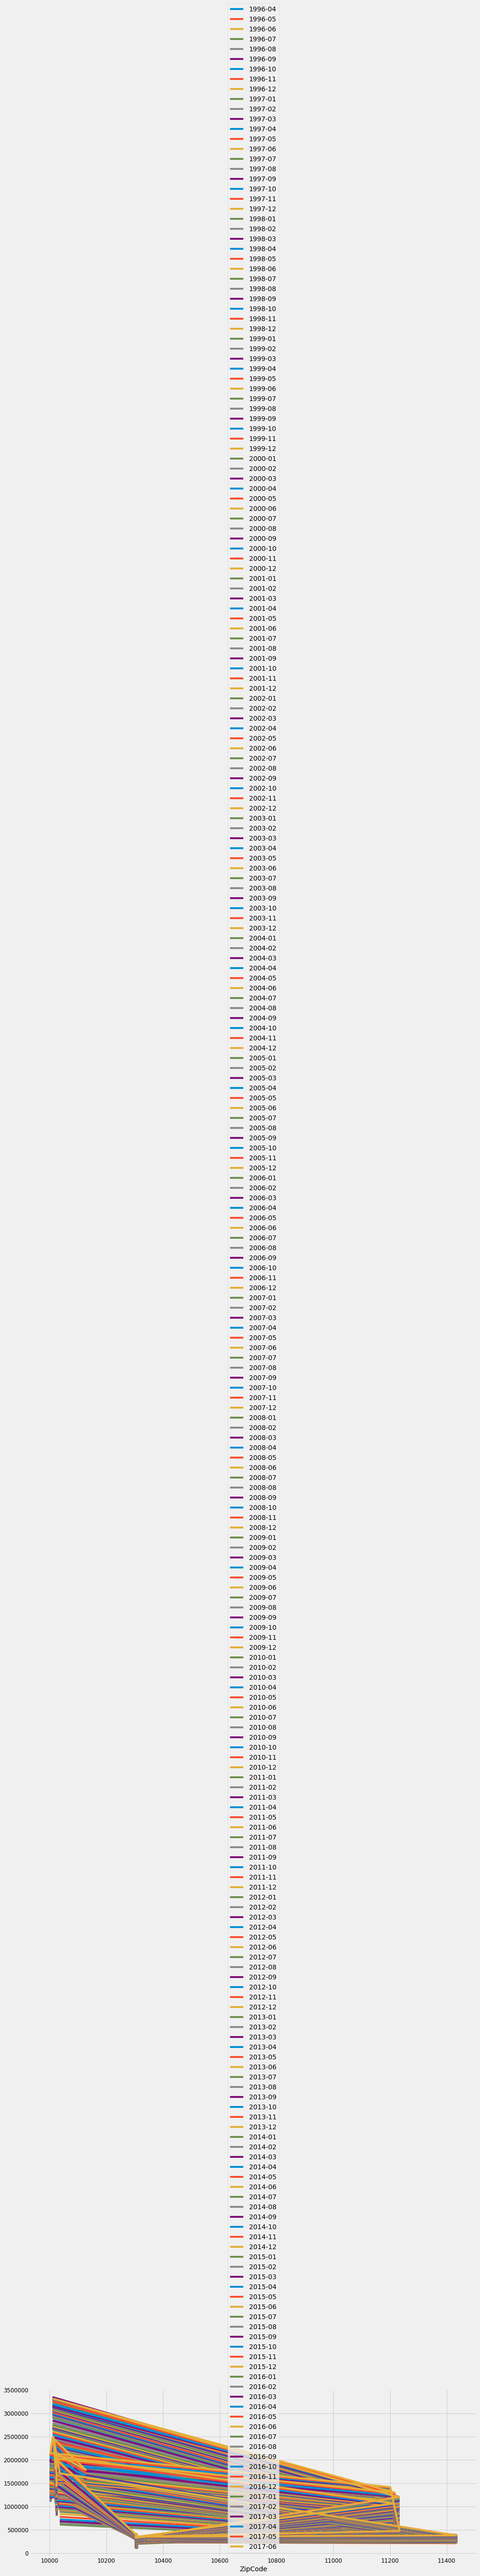

In [94]:
df.plot(figsize=(15, 6))
plt.show()

In [105]:
col = df.iloc[:,100:]
df =


In [ ]:
df.hist(bins=20)
plot.show()

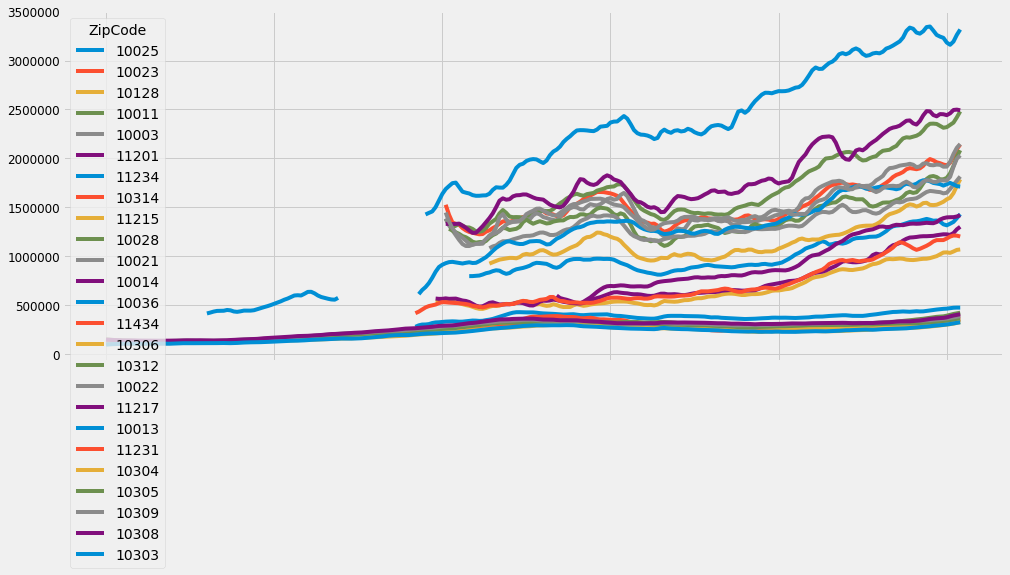

In [103]:
df_t.plot(figsize=(15, 6))
#df_t.xlabel('Year')
#df_t.ylabel('Median price')
plt.show()

In [114]:
pd.date_range('1996-04','2017-06', 
              freq='MS').strftime("%Y-%d").tolist()

['1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1996-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1997-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1998-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '1999-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2000-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2001-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2002-01',
 '2003-01',
 '2003-01',
 '20

In [111]:
daterange = pd.date_range('2014-10-10','2016-01-07' , freq='M') 
daterange = daterange.union([daterange[-1] + 1])  
daterange = [d.strftime('%y-%b') for d in daterange]
daterange

['14-Oct',
 '14-Nov',
 '14-Dec',
 '15-Jan',
 '15-Feb',
 '15-Mar',
 '15-Apr',
 '15-May',
 '15-Jun',
 '15-Jul',
 '15-Aug',
 '15-Sep',
 '15-Oct',
 '15-Nov',
 '15-Dec',
 '16-Jan']